<a href="https://colab.research.google.com/github/NPC39/Cleanzing_Data_Global_Freelancers/blob/main/Global_Freelance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

print("already read a data set")

already read a data set


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


df = pd.read_csv('global_freelancers_raw.csv')

# Data Cleaning

In [22]:
df['gender'] = df['gender'].str.lower().str.strip()
gender_map = {
    'f': 'Female', 'female': 'Female', 'femail': 'Female',
    'm': 'Male', 'male': 'Male', 'mail': 'Male',
    'non-binary': 'Other', 'other': 'Other'
}
df['gender'] = df['gender'].replace(gender_map)

In [23]:
def clean_rate(val):
    if pd.isna(val): return np.nan
    val = str(val).replace('USD', '').replace('$', '').strip()
    try:
        return float(val)
    except:
        return np.nan

df['hourly_rate_numeric'] = df['hourly_rate (USD)'].apply(clean_rate)


In [24]:
def clean_sat(val):
    if pd.isna(val): return np.nan
    val = str(val).replace('%', '').strip()
    try:
        return float(val)
    except:
        return np.nan

df['client_satisfaction_numeric'] = df['client_satisfaction'].apply(clean_sat)

In [25]:
df['is_active'] = df['is_active'].astype(str).str.lower().str.strip()
active_map = {'1': 'Yes', 'y': 'Yes', 'yes': 'Yes', 'true': 'Yes',
              '0': 'No', 'n': 'No', 'no': 'No', 'false': 'No'}
df['is_active'] = df['is_active'].map(active_map)

df['age'] = df['age'].fillna(df['age'].median())
df['years_of_experience'] = df['years_of_experience'].fillna(df['years_of_experience'].median())
df['hourly_rate_numeric'] = df['hourly_rate_numeric'].fillna(df['hourly_rate_numeric'].median())
df['rating'] = df['rating'].fillna(df['rating'].median())
df['is_active'] = df['is_active'].fillna('No')

df.loc[df['age'] - df['years_of_experience'] < 16, 'years_of_experience'] = df['age'] - 18

df.to_csv('global_freelancers_cleaned.csv', index=False)

# Visualization

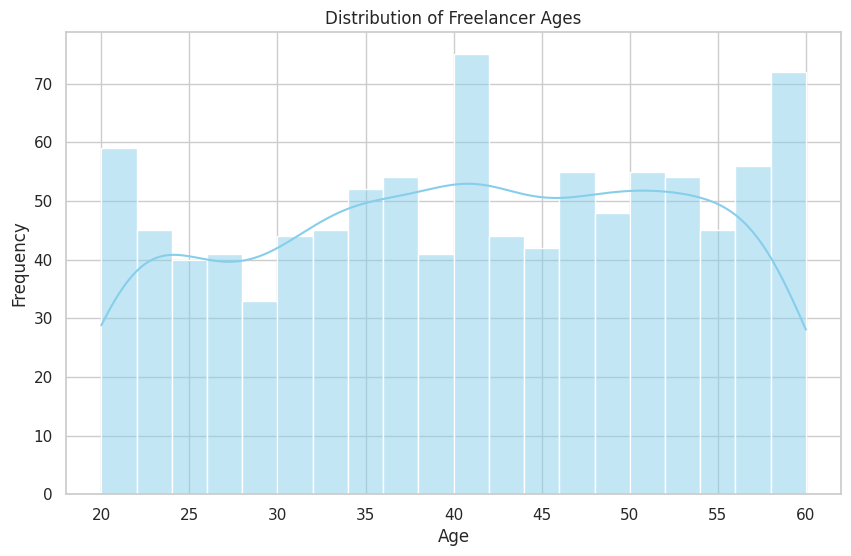

/tmp/ipython-input-1628525476.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='hourly_rate_numeric', y='primary_skill', palette='Set3')


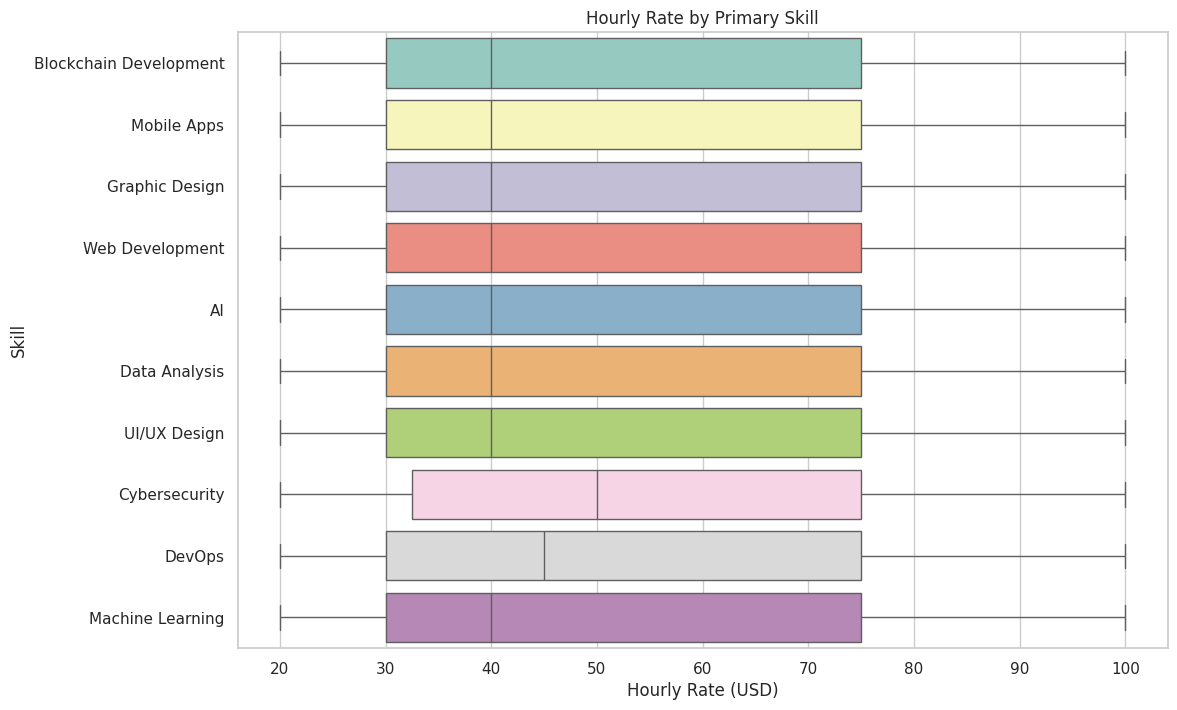

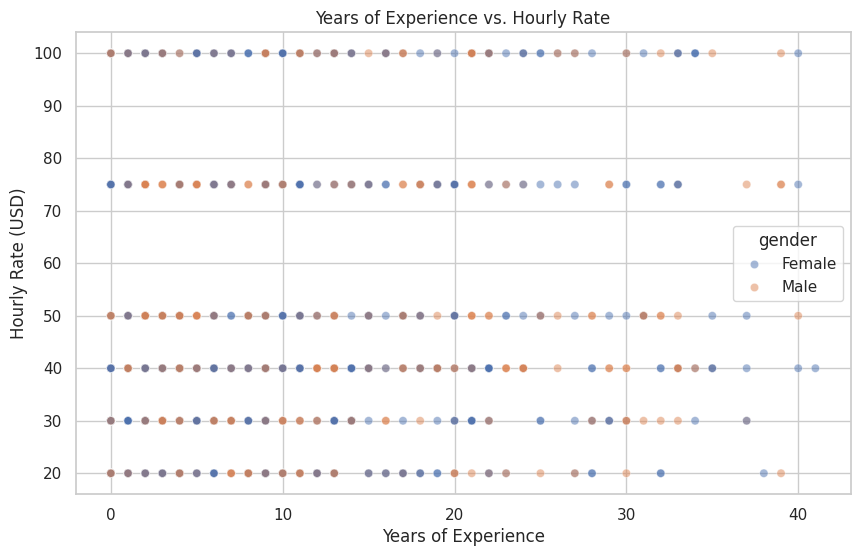

95% Confidence Interval for Hourly Rate: (np.float64(49.66045828077137), np.float64(52.919541719228626))


In [26]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Freelancer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='hourly_rate_numeric', y='primary_skill', palette='Set3')
plt.title('Hourly Rate by Primary Skill')
plt.xlabel('Hourly Rate (USD)')
plt.ylabel('Skill')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='years_of_experience', y='hourly_rate_numeric', alpha=0.5, hue='gender')
plt.title('Years of Experience vs. Hourly Rate')
plt.xlabel('Years of Experience')
plt.ylabel('Hourly Rate (USD)')
plt.show()


mean_rate = df['hourly_rate_numeric'].mean()
sem_rate = stats.sem(df['hourly_rate_numeric'])
ci_rate = stats.t.interval(0.95, len(df['hourly_rate_numeric'])-1, loc=mean_rate, scale=sem_rate)

print(f"95% Confidence Interval for Hourly Rate: {ci_rate}")

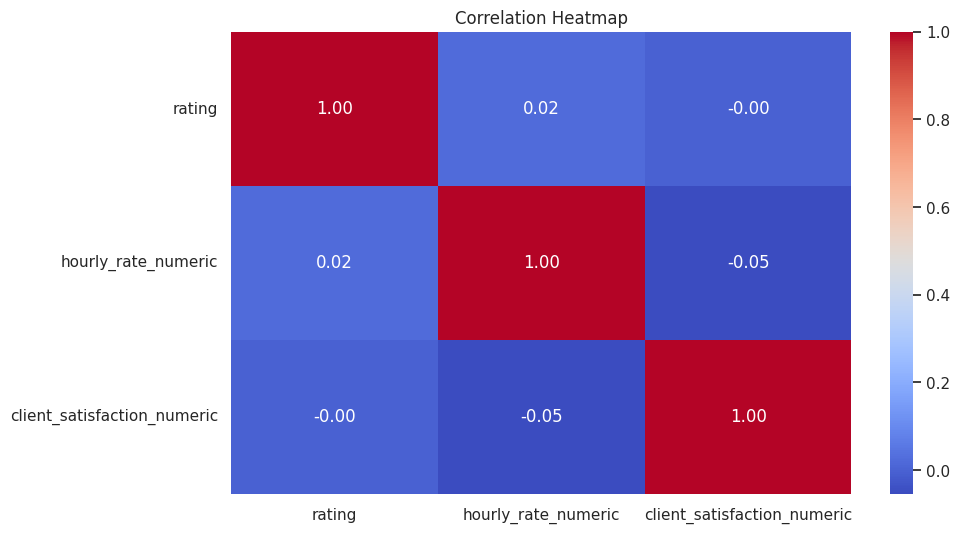

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[["rating","hourly_rate_numeric","client_satisfaction_numeric"]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Descriptive Statistics

In [50]:
print("\n7.1 Categorical Variables")
col_cat = 'gender'
print(f"gender distribution:")
counts = df[col_cat].value_counts()
total = len(df)
for idx, val in counts.items():
    percent = (val / total) * 100
    print(f"{idx}: {val} students ({percent:.1f}%)")


7.1 Categorical Variables
gender distribution:
Male: 510 students (51.0%)
Female: 490 students (49.0%)


In [51]:
print(f"\n7.2 Ordinal Variable: client_satisfaction_numeric")
col_ord = 'client_satisfaction_numeric'
n_valid = len(valid_data)


median = valid_data.median()
q1 = valid_data.quantile(0.25)
q3 = valid_data.quantile(0.75)
iqr = q3 - q1

print(f"Using {n_valid} valid responses:")
print(f"Median = {median:.0f}, Q1 ={q1:.0f}, Q3 ={q3:.0f}, IQR={iqr:.0f}")


7.2 Ordinal Variable: client_satisfaction_numeric
Using 824 valid responses:
Median = 79, Q1 =70, Q3 =89, IQR=19


In [52]:
print(f"\n7.3 Continuous Variable: hourly_rate_numeric")
col_cont = 'hourly_rate_numeric'
mean = df[col_cont].mean()
median = df[col_cont].median()
q1 = df[col_cont].quantile(0.25)
q3 = df[col_cont].quantile(0.75)
iqr = q3 - q1
upper_fence = q3 + 1.5 * iqr

print(f"Mean = {mean:.2f}, Median = {median:.2f}")
print(f"Q1 ={q1:.2f}, Q3 ={q3:.2f}, IQR ={iqr:.2f}")
print(f"Outlier detection (1.5 × IQR rule):")
print(f"Upper fence = {q3:.2f} +1.5({iqr:.2f}) = {upper_fence:.3f}")

outliers = df[df[col_cont] > upper_fence][col_cont].values
if len(outliers) > 0:
    for out_val in outliers:
        print(f"{col_cont} = {out_val} is flagged as an outlier.")
else:
    print("No outliers detected.")


7.3 Continuous Variable: hourly_rate_numeric
Mean = 51.29, Median = 40.00
Q1 =30.00, Q3 =75.00, IQR =45.00
Outlier detection (1.5 × IQR rule):
Upper fence = 75.00 +1.5(45.00) = 142.500
No outliers detected.


In [53]:
print(f"\n7.4 Numerical Variable: rating")
col_num = 'rating'
mean = df[col_num].mean()
median = df[col_num].median()
q1 = df[col_num].quantile(0.25)
q3 = df[col_num].quantile(0.75)
iqr = q3 - q1

print(f"Mean = {mean:.2f}, Median = {median:.1f}")
print(f"Q1 ={q1:.1f}, Q3 ={q3:.1f}, IQR ={iqr:.0f}")
print("Interpretation: Mean and median are close, supporting the use of Mean + SD")


7.4 Numerical Variable: rating
Mean = 2.52, Median = 2.6
Q1 =1.5, Q3 =3.7, IQR =2
Interpretation: Mean and median are close, supporting the use of Mean + SD
